## Linear Regression
#### Import package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

#### Download sample dataset

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-02-18 14:22:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
正在查找主機 s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
正在連接 s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   179KB/s    in 0.4s    

2019-02-18 14:22:51 (179 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Find linear regression model for ENGINESIZE and CO2EMISSIONS

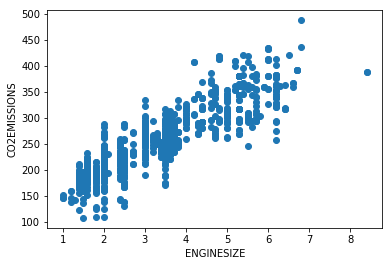

In [4]:
train_x = df.ENGINESIZE.values
train_y = df.CO2EMISSIONS.values
plt.scatter(train_x, train_y)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

#### Define linear regression function

In [5]:
X = tf.placeholder("float")
y = tf.placeholder("float")

a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

pred = a * X + b

#### Define loss function as root mean square error
`tf.reduce_mean(error_function)`

In [6]:
loss = tf.reduce_mean(tf.sqrt(tf.square(pred - y)))

#### Define optimizer using GradientDescentOptimizer
`tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)`

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

#### Initial variables

In [8]:
init = tf.global_variables_initializer()

#### Start training process

In [9]:
with tf.Session() as session:
    loss_values = []
    coefficients = []
    session.run(init)
    for epoch in range(500):
        _, loss_val, a_val, b_val = session.run([optimizer, loss, a, b], feed_dict={X: train_x, y: train_y})
        loss_values.append(loss_val)
        coefficients.append([a_val, b_val])
        if (epoch+1) % 25 == 0:
            print('Epoch:{:02d}'.format(epoch+1), 'loss=', '{:.2f}'.format(loss_val), 'a=', a_val, 'b=', b_val)

Epoch:25 loss= 236.98 a= 5.57239 b= 1.21241
Epoch:50 loss= 221.73 a= 9.75526 b= 2.46241
Epoch:75 loss= 206.49 a= 13.9381 b= 3.71241
Epoch:100 loss= 191.24 a= 18.121 b= 4.96242
Epoch:125 loss= 175.99 a= 22.3039 b= 6.21242
Epoch:150 loss= 160.74 a= 26.4867 b= 7.46242
Epoch:175 loss= 145.50 a= 30.6696 b= 8.71243
Epoch:200 loss= 130.25 a= 34.8525 b= 9.96243
Epoch:225 loss= 115.00 a= 39.0354 b= 11.2124
Epoch:250 loss= 99.86 a= 43.2022 b= 12.4598
Epoch:275 loss= 85.20 a= 47.2964 b= 13.6952
Epoch:300 loss= 72.05 a= 51.1585 b= 14.8852
Epoch:325 loss= 62.00 a= 54.5041 b= 15.9774
Epoch:350 loss= 54.62 a= 57.3554 b= 16.9758
Epoch:375 loss= 49.54 a= 59.6879 b= 17.8712
Epoch:400 loss= 46.29 a= 61.5251 b= 18.6518
Epoch:425 loss= 44.34 a= 62.9158 b= 19.3284
Epoch:450 loss= 43.08 a= 64.0042 b= 19.9294
Epoch:475 loss= 42.39 a= 64.7614 b= 20.4485
Epoch:500 loss= 41.94 a= 65.3255 b= 20.9237


#### Visualize loss values through the training process

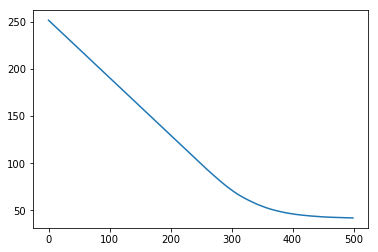

In [10]:
plt.plot(loss_values)

#### Visualize the linear regression model optimized by gradient descent

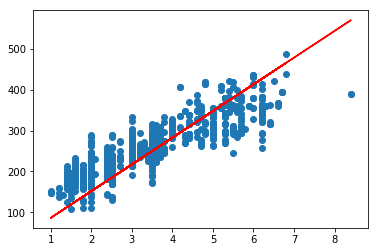

In [11]:
(a_val, b_val) = coefficients[-1]
line = plt.plot(train_x, a_val * train_x + b_val)
plt.setp(line, color='red')
plt.scatter(train_x, train_y)